In [35]:
from qiskit_ibm_runtime import QiskitRuntimeService 

In [36]:
service = QiskitRuntimeService.save_account(
    token="nuuu e nimic aici", # IBM Cloud API key.
    # Your token is confidential. Do not share your token in public code.
    instance="PracticaVara", # Optionally specify the instance to use.
    region="us-east", # Optionally set the region to prioritize. Accepted values are 'us-east' or 'eu-de'. This is ignored if the instance is specified.
    set_as_default=True, # Optionally set these as your default credentials.
  )

AccountAlreadyExistsError: 'Named account (default-ibm-quantum-platform) already exists. Set overwrite=True to overwrite.'

In [37]:
service = QiskitRuntimeService()
backends = service.backends(simulator=False)
print(backends)
backend = backends[0]

[<IBMBackend('ibm_torino')>, <IBMBackend('ibm_brisbane')>]


In [67]:
import numpy as np
from qiskit.circuit.library import efficient_su2
 
circuit = efficient_su2(127, entanglement="linear")
circuit.measure_all()
# The circuit is parametrized, so we will define the parameter values for execution
param_values = np.random.rand(circuit.num_parameters)

In [68]:
from qiskit.transpiler import generate_preset_pass_manager
 
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(circuit)
print(f">>> Circuit ops (ISA): {isa_circuit.count_ops()}")

>>> Circuit ops (ISA): OrderedDict([('sx', 3488), ('rz', 3036), ('cz', 1296), ('measure', 127), ('barrier', 1)])


In [69]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
 
sampler = Sampler(mode=backend)

In [70]:
job = sampler.run([(isa_circuit, param_values)])
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d2od715poa4c73c7o6o0
>>> Job Status: QUEUED


In [ ]:
result = job.result()
 
# Get results for the first (and only) PUB
pub_result = result[0]
print(
    f"First ten results for the 'meas' output register: {pub_result.data.meas.get_bitstrings()[:10]}"
)

First ten results for the 'meas' output register: SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=127>)), metadata={'circuit_metadata': {}})


Varianta cu simulare pe backend simulat


In [15]:
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler
 
# Bell Circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
 
# Run the sampler job locally using AerSimulator.
# Session syntax is supported but ignored because local mode doesn't support sessions.
aer = AerSimulator.from_backend(backend=backend)
pm = generate_preset_pass_manager(backend=aer, optimization_level=1)
isa_qc = pm.run(qc)
isa_qc = pm.run(qc)
sampler = Sampler(mode=aer)
result = sampler.run([isa_qc]).result()
print(result[0].data.meas.get_bitstrings())

['11', '01', '00', '11', '01', '00', '10', '11', '00', '11', '00', '11', '11', '00', '10', '00', '00', '11', '00', '00', '00', '01', '11', '00', '10', '11', '00', '00', '00', '01', '10', '00', '00', '11', '00', '11', '11', '11', '00', '00', '00', '11', '01', '00', '11', '00', '11', '00', '00', '00', '00', '11', '00', '00', '11', '00', '00', '00', '00', '00', '11', '11', '00', '01', '11', '11', '11', '00', '11', '00', '11', '00', '00', '00', '00', '00', '00', '11', '00', '00', '11', '11', '11', '10', '01', '00', '11', '00', '10', '11', '11', '11', '11', '11', '11', '00', '11', '11', '00', '11', '01', '00', '11', '11', '11', '00', '00', '00', '00', '00', '10', '11', '11', '11', '11', '00', '00', '11', '00', '00', '00', '11', '10', '10', '10', '00', '00', '11', '11', '00', '11', '10', '10', '01', '01', '11', '00', '10', '01', '11', '00', '00', '00', '00', '11', '00', '00', '11', '11', '11', '00', '11', '00', '11', '11', '11', '11', '10', '11', '11', '00', '00', '10', '11', '00', '11', '11

In [16]:

from qiskit.visualization import plot_histogram
from qiskit.circuit.library.phase_oracle import PhaseOracle
from qiskit.circuit.library import grover_operator




expression = '(w | x) & (~y | z) & (x | y | z)'

oracle = PhaseOracle(expression)
# reflection_qubits = [0, 3]
state_preparation = QuantumCircuit(4)
state_preparation.x(0)  # Apply an X gate to the first qubit to set it to 1
grover_op = grover_operator(oracle)
grover_op.draw("mpl")
# grover_op.num_qubits


MissingOptionalLibraryError: "The 'tweedledum' library is required to use 'PhaseOracle'. You can install it with 'pip install tweedledum'."

In [10]:
from qiskit import QuantumCircuit
from qiskit_algorithms import AmplificationProblem

# the state we desire to find is '11'
good_state = ["11"]

# specify the oracle that marks the state '11' as a good solution
oracle = QuantumCircuit(2)
oracle.cz(0, 1)

# define Grover's algorithm
problem = AmplificationProblem(oracle, is_good_state=good_state)

# now we can have a look at the Grover operator that is used in running the algorithm
# (Algorithm circuits are wrapped in a gate to appear in composition as a block
# so we have to decompose() the op to see it expanded into 
problem.grover_operator.decompose().draw(output="mpl")

from qiskit_algorithms import Grover
from qiskit.primitives import Sampler


grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
print("Result type:", type(result))
print()
print("Success!" if result.oracle_evaluation else "Failure!")
print("Top measurement:", result.top_measurement)

Result type: <class 'qiskit_algorithms.amplitude_amplifiers.grover.GroverResult'>

Success!
Top measurement: 11


/tmp/ipykernel_6854/2912481728.py:23: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  grover = Grover(sampler=Sampler())


Attempting to solve 'tests/test_unit.cnf'...
--- Solving: test_unit.cnf ---
  Algorithm finished in 0.0113 seconds.
  Plotting results...


/tmp/ipykernel_7521/696418221.py:27: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  grover = Grover(sampler=Sampler())


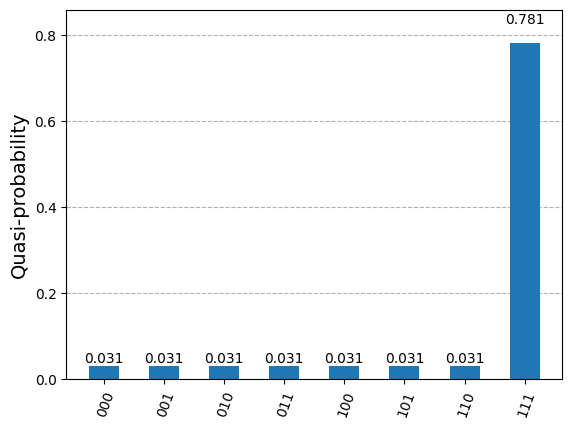

---------------------------
0.78
    - Bitstring: 111 (Probability: 0.7812)
{'111': np.float64(0.7812499999999983)}

Run complete.


In [62]:
import os
import time
from qiskit.circuit.library import PhaseOracle
from qiskit_algorithms import AmplificationProblem, Grover
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- Function to solve a single DIMACS file ---
def solve_dimacs_with_grover(filepath):
    """
    Solves a SAT problem from a DIMACS CNF file using Grover's algorithm.
    """
    print(f"--- Solving: {os.path.basename(filepath)} ---")
    
    # 1. Create the oracle from the DIMACS file
    try:
        oracle = PhaseOracle.from_dimacs_file(filepath)
    except Exception as e:
        print(f"  Error creating oracle: {e}")
        return

    # 2. Define the amplification problem for Grover's algorithm
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)

    # 3. Instantiate Grover's algorithm with a local sampler
    grover = Grover(sampler=Sampler())

    # 4. Run the algorithm to find a solution
    start_time = time.time()
    result = grover.amplify(problem)
    end_time = time.time()
    duration = end_time - start_time
    print(f"  Algorithm finished in {duration:.4f} seconds.")
    
    # 5. Plot the results as a histogram
    print("  Plotting results...")
    # The circuit_results attribute contains the data from the sampler.
    # We plot the first (and only) result from the list.
    if result.circuit_results:
        display(plot_histogram(result.circuit_results[0]))
    else:
        print("  No circuit results to plot.")
    print("-" * (len(os.path.basename(filepath)) + 14))
    sorted_results = sorted(result.circuit_results[0].items(), key=lambda item: item[1], reverse=True)
    # first_result = round(sorted_results[0][1], 2) if sorted_results else (None, 0)
    top_measurement = round(sorted_results[0][1], 2) if sorted_results else None
    print(top_measurement)
    filtered_results = {
                k: v for k, v in sorted_results if round(v, 2) == top_measurement
            }
    for bitstring, probability in filtered_results.items():
        print(f"    - Bitstring: {bitstring} (Probability: {probability:.4f})")
    print(filtered_results)

# --- Main execution ---
# Specify the single DIMACS file you want to solve
target_file = 'tests/test_unit.cnf' # <--- CHANGE THIS FILENAME TO RUN A DIFFERENT TEST

print(f"Attempting to solve '{target_file}'...")

if os.path.exists(target_file):
    solve_dimacs_with_grover(target_file)
else:
    print(f"Error: File '{target_file}' not found.")

print("\nRun complete.")

In [74]:
# incercare de a rula pe backend dar face cam urat 
import os
import time
from qiskit.circuit.library import PhaseOracle
from qiskit_algorithms import AmplificationProblem, Grover
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.transpiler import generate_preset_pass_manager
# from qiskit_algorithms import optimal_num_iterations

# --- Function to solve a single DIMACS file ---
def solve_dimacs_with_grover(filepath):
    """
    Solves a SAT problem from a DIMACS CNF file using Grover's algorithm.
    """
    print(f"--- Solving: {os.path.basename(filepath)} ---")
    
    # 1. Create the oracle from the DIMACS file
    try:
        oracle = PhaseOracle.from_dimacs_file(filepath)
    except Exception as e:
        print(f"  Error creating oracle: {e}")
        return

    # 2. Define the amplification problem for Grover's algorithm
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)

    # 3. Instantiate Grover's algorithm with a local sampler
    power = 2
    grover_op = Grover()
    circuit = grover_op.construct_circuit(problem, power=power, measurement=True)
    print(f"  Ideal circuit depth: {circuit.depth()}, Ops: {circuit.count_ops()}")

    # Construct the full Grover circuit to see its complexity
    # To construct a circuit for analysis, we must specify the number of iterations ('power').
    # We'll calculate the optimal number assuming there is 1 solution.
    # power = optimal_num_iterations(num_solutions=1, num_qubits=problem.oracle.num_qubits)
    print(f"  (For analysis, constructing a sample circuit with {power} Grover iteration(s))")
    
    # CORRECTED: Pass the 'power' argument to construct_circuit
    print(f"  Transpiling circuit for '{backend.name}'...")
    pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
    isa_circuit = pm.run(circuit)
    print(f"  Transpiled (ISA) circuit depth: {isa_circuit.depth()}, Ops: {isa_circuit.count_ops()}")


    # 4. Run the algorithm to find a solution
    print("  Submitting job to backend...")
    start_time = time.time()
    job = sampler.run([isa_circuit])
    print(f"  > Job ID: {job.job_id()}")
    result = job.result()
    end_time = time.time()
    duration = end_time - start_time
    print(f"  Job finished in {duration:.4f} seconds.")
    

    pub_result = result[0]
    counts = pub_result.data
    print(counts)
    bitarray = next(iter(counts.values()))
    print(bitarray.get_counts())
    # # 5. Plot the results as a histogram
    # print("  Plotting results...")
    # # The circuit_results attribute contains the data from the sampler.
    # # We plot the first (and only) result from the list.
    # if result.circuit_results:
    #     display(plot_histogram(result.circuit_results[0]))
    # else:
    #     print("  No circuit results to plot.")
    # print("-" * (len(os.path.basename(filepath)) + 14))
    # sorted_results = sorted(result.circuit_results[0].items(), key=lambda item: item[1], reverse=True)
    # # first_result = round(sorted_results[0][1], 2) if sorted_results else (None, 0)
    # top_measurement = round(sorted_results[0][1], 2) if sorted_results else None
    # print(top_measurement)
    # filtered_results = {
    #             k: v for k, v in sorted_results if round(v, 2) == top_measurement
    #         }
    # for bitstring, probability in filtered_results.items():
    #     print(f"    - Bitstring: {bitstring} (Probability: {probability:.4f})")
    # print(filtered_results)

# --- Main execution ---
# Specify the single DIMACS file you want to solve
target_file = 'tests/test_unit.cnf' # <--- CHANGE THIS FILENAME TO RUN A DIFFERENT TEST

print(f"Attempting to solve '{target_file}'...")

if os.path.exists(target_file):
    solve_dimacs_with_grover(target_file)
else:
    print(f"Error: File '{target_file}' not found.")

print("\nRun complete.")

Attempting to solve 'tests/test_unit.cnf'...
--- Solving: test_unit.cnf ---
  Ideal circuit depth: 4, Ops: OrderedDict([('h', 3), ('measure', 3), ('Q', 2)])
  (For analysis, constructing a sample circuit with 2 Grover iteration(s))
  Transpiling circuit for 'ibm_torino'...
  Transpiled (ISA) circuit depth: 159, Ops: OrderedDict([('sx', 89), ('rz', 80), ('cz', 48), ('measure', 3), ('x', 2)])
  Submitting job to backend...
  > Job ID: d2od7hlt2ras73bc2hc0
  Job finished in 5.8880 seconds.
DataBin(c46=BitArray(<shape=(), num_shots=4096, num_bits=3>))
{'111': 3087, '110': 208, '011': 163, '001': 85, '010': 115, '100': 149, '000': 143, '101': 146}

Run complete.
